# Introduction

In this project we will be working with surveys from the employees of the Department of Education, Training and Eployment (DETE) and the Technical and Further Education (TAFE) Institute in Queensland, Australia. 


## DataSet

To download the dataset we will be using today, you can find the DETE exit survey [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). Both Datasets were updated on October 7th 2019 and are available to download via csv files. The surveys provide value information regarding the reasons why employees resign or retire. This information can be further used to inform the departments in making decisions regarding attraction and retention initiatives across different working practices.

### Quick Column Description 

#### DETE Survey:
- **ID:** An id used to identify the participant of the survey
- **SeparationType:** The reason why the person's employment ended
- **Cease Date:** The year or month the person's employment ended
- **DETE Start Date:** The year the person began employment with the DETE

#### TAFE Survey:
- **Record ID:** An id used to identify the participant of the survey
- **Reason for ceasing employment:** The reason why the person's employment ended
- **LengthofServiceOverall. Overall Length of Service at Institute (in years):** The length of the person's employment (in years)



## Goal

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


### Project Goal

The goal of this project is to showcase an understaning of basic python Data cleaning fundamentals. 

**Within this project you will see a combination of:**
- data aggregation
- combining of data
- transformation of data
- string manipulation
- working with missing or duplicated data.

In [1]:
#Import modules and dataset

#Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Read csv files for DETE and FATE surveys
dete_survey = pd.read_csv('C:/Users/sarth/Desktop/dete_survey.csv')
tafe_survey = pd.read_csv('C:/Users/sarth/Desktop/tafe_survey.csv')

In [2]:
#Explore the Both Dataset

#Create a function that explores the dataset and checks missing for missing values
def explore_dataset(dataset):
    print(dataset.info())
    print(dataset.head(3))
    sns.heatmap(dataset.isnull(),cbar = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

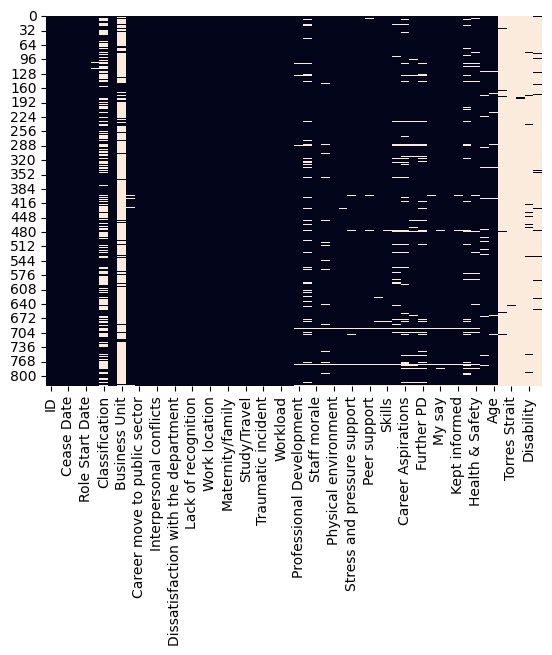

In [3]:
#Explore DETE survey
explore_dataset(dete_survey)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

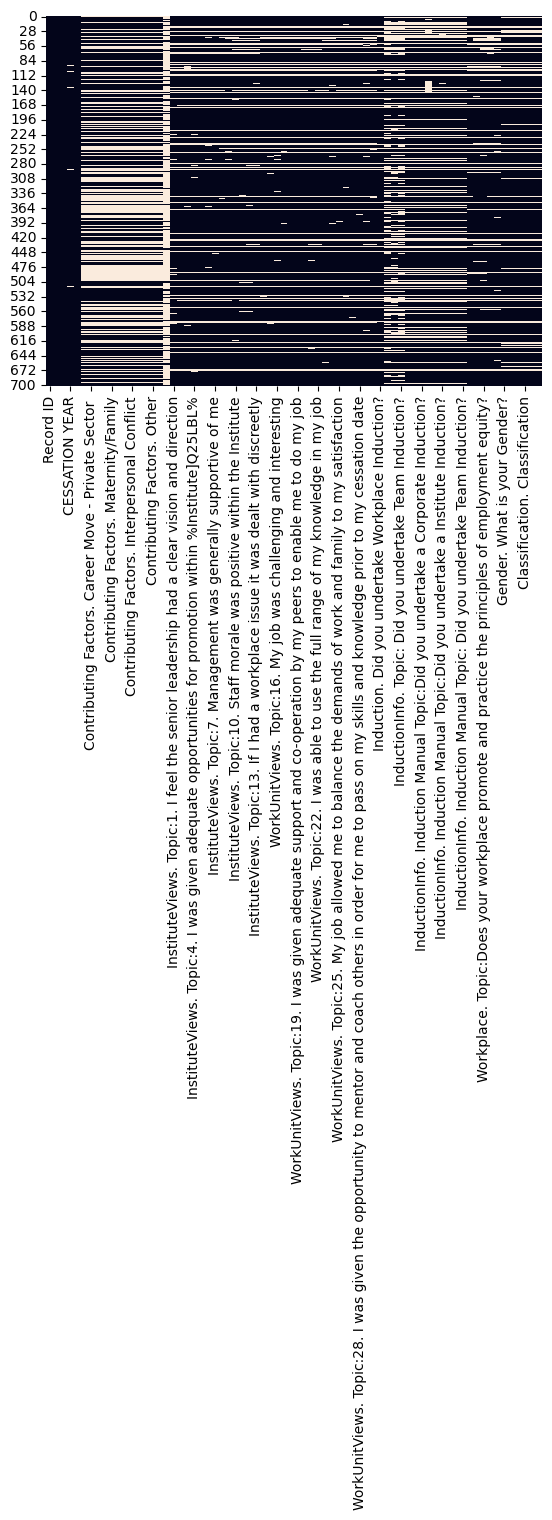

In [4]:
#Explore TAFE survey
explore_dataset(tafe_survey)

### Dataset Exploration Observations

#### DETE Dataset:

- This data has combination of boolean values and Y/N values for binary answers. For example, Gender can be either Y/N or T/F. The dataset need consistency in order to create an easier environment to preform analysis.
- Given the spread of the null value count, the survey must questions that are either mandatory or optional to answer.
- Columns are not showing null values as NaN.

#### TAFE Dataset:

- questions are being answered as an object, Example: Yes/No
- Columns are not showing null values as NaN
- The survey must allow for optional answers to questions.

### Gameplan From Observations

1. Load in the dataset again to make sure null values are showing up as NaN values.
2. Remove columns that are not required to accomplish are goal for this project.
3. Adjust column names for DETE and FATE datasets.
   1. Make all the capitalization lowercase.
   2. Remove trailing whitespace from the end strings.
   3. Replace spaces with underscores.
4. Combine datasets.

In [5]:
#Read in DETE and FATE datasets
dete_survey = pd.read_csv('C:/Users/sarth/Desktop/dete_survey.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('C:/Users/sarth/Desktop/tafe_survey.csv', na_values = 'Not Stated')

In [6]:
#Drop columns that are not needed for project objective

#Drop DETE columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis = 1)

#Drop FATE columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)


In [7]:
#Adjust both DETE and TAFE column names

#Before DETE column name adjustment
print(dete_survey_updated.columns)

#Use string manipulation to adjust column names in DETE dataset
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [8]:
#After DETE column name adjustment
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
#Adjust TAFE column names by using rename

#Before TAFE column name adjustment
print(tafe_survey_updated.columns)

#Renamed column's dictionary
tafe_column_names = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
                     'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
                     'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position',
                     'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                     'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

#Rename TAFE column names
tafe_survey_updated = tafe_survey_updated.rename(tafe_column_names, axis = 1)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [10]:
#After TAFE column name adjustment
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Rename Columns Explination

With the intention of combining both datasets in the future, I decided to adjust column names to eliminate any issues regarding duplicating names that have different data points. Additionally, the adjustment of column names can be attributed to quality of life changes that will make data more identifiable with its column name.

#### DETE Dataset

In order to show a fundamental understanding of string manipulation, I used several string functions such as (replace lower, and strip) to adjust all columns names to fit a specific format.

#### TAFE Dataset:

In regards to the TAFE column name changes, I used the rename function to edit specific named columns within the dataset. Unlike the DETE dataset column name adjustment,using string manipulation functions, the rename function allows us to point at an individual column name and only adjust that specific column.


### Filtering Resignation From The seperationtype Column

#### Project Goal Review:

1. Are employees who only worked for the institutes for a short period of time **resigning** due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees **resigning** due to some kind of dissatisfaction? What about older employees?

   - Note: the goal of this project is to find why employees are "Resigning"
   
#### Gameplan

1. Find the unique values for the separationtype columns.

    - If we look at the unique values for the separationtype column we will notice that there are about three different values for resignation (other reasons, other employer, and move overseas/interstate).
    - Notice how there is only 1 type of resignation value in the TAFE dataset.
    
    
2. Adjust the Seperationtype columns in the DETE dataset to match the Resignation value in the TAFE dataset. In otherwords, contain just one Resignation value in the separationtype column.

3. Check your results.

In [11]:
#Count Unique values for the Seperationtype column in the DETE and TAFE dataset

#Find unique values for DETE dataset
print(dete_survey_updated['separationtype'].value_counts())

print('\n')

#Find unique values for TAFE dataset
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [12]:
#Update DETE separationtype column

#Use str.split and str to reduce the different resignation values to only one type
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

#Check the value counts for DETE separationtype column
print(dete_survey_updated['separationtype'].value_counts())

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64


In [13]:
#Filter the DETE and TAFE dataset to contain rows where separationtype is Resignation
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

#Check the the Filter
print(dete_resignations['separationtype'].value_counts())
tafe_resignations['separationtype'].value_counts()

Resignation    311
Name: separationtype, dtype: int64


Resignation    340
Name: separationtype, dtype: int64

### Adjusting The cease_date Column and Checking The dete_start_date Logic

When looking at the cease_date columns we notice that some unique values have a month and a year value within the DETE dataset. For instance, Example 1: (2012), Example 2: (01/2014). This type of discrepancy can lead the column to be misrepresent in our analysis if it's not properally formated to a specific standard. In this case, we will format the DETE cease_date column to that of the TAFE cease_date column.

- **Checking the Logic of start date vs cease date:** Given that most people within their field start their job around 20 years old and stop working around the age of 70, give or take. We can assume the max working career at the department is 50 to 55 years. Therefore, we should restrict the cease_date to be its highest at 2014 and its startdate at lowest 1960. Given that the lowest start date is 1963 and the highest cease_date is 2004 They fall within the bouds of logical age to work.

- **For Clarity:** 2004 - 1960 = 54yrs   (start at age 20 + 54 = 74yrs old)    74 is the max age you can work at the department
    
#### Gameplan

1. Count the unique values in the cease_date column for both the DETE and TAFE Datasets.
2. Correct the discrepancies in the DETE cease_date column.
    1. Keep the Year date only.
    2. Change data type into a float
3. Check your results.
4. Check the DETE Start DAte for logical outliers

In [14]:
#Count unique values within the cease_date column for datasets DETE anda TAFE

#DETE: Find the unique value_counts for the cease_date column
print(dete_resignations['cease_date'].value_counts())
print('\n')

#TAFE: Find the unique value_counts for the cease_date column
tafe_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64




2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [15]:
#Correct the format for the cease_date column within the DETE dataset
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

#Change the cease_date column values to a float data type
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

#Check results 
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [16]:
#Check the unique values within the start_date column for DETE dataset

#DETE: Find the unique value counts for the start_date column
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

### Create another column within the DETE database

Let's say we wanted to know specifically how long an employee worked within their department. Right now there is not an easy way to determine their total years worked without looking at both the start_date and cease_date columns together and doing some mental math. in order to find how long each employee worked for the department more efficiently, I will create a column that will hold the results from substraction of the start date from the cease date.

**Example:** 2006(cease_date) - 1980(start_date) = 26(institute_service) ~ new column

In [17]:
#Create a new colum that holds the amount of years worked for each employee

#Create a new column that substracts start_date from cease_date
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

#Check the new column results with dete_start_date and cease_date
dete_resignations[['dete_start_date','cease_date','institute_service']].head(5)

,dete_start_date,cease_date,institute_service
3,2005.0,2012.0,7.0
5,1994.0,2012.0,18.0
8,2009.0,2012.0,3.0
9,1997.0,2012.0,15.0
11,2009.0,2012.0,3.0


### Identify Employees Who Resigned Because They Were Dissatisfied

#### Project Goal Review:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of **dissatisfaction?** What about employees who have been there longer?

2. Are younger employees resigning due to some kind of **dissatisfaction?** What about older employees?

    - note: What kind of dissatisfaction in the workplace are people resigning over?
    
#### Purpose of Creating a new dissatisfied column

The idea behind creating this new column is to determine whether ex-employees are dissatisfied with their department upon resignation. To better understand both datasets, I will aggregate all columns relating to dissatisfaction and create a new column named {dissatisfaction} that will satisfy the question with a simple(True, False, or NaN) value.
    
##### Columns going into dissatisfied column

1. tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
2. detesurveyupdated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    
    
    - Notice: dete_resignations dataset contains boolean datatypes for the dissatisfaction columns, while the tafe_resignation dataset contains objects datatypes for the dissatisfaction columns.
    
    
##### Gameplan: Create a dissatisfied column with the DETE and TAFE datesets

1. Check the unique value count for both DETE and TAFE dataframes.
    - We change the TAFE values to either (True. False, or NaN).
2. Create a function that will determine whether an ex-employee is dissatisfied upon resignation.
    - Example: if ex-employee has any value in the dissatisfaction columns it will be marked down as true, otherwise false.
3. Create a new column that will aggregate two dissatisfaction columns using the function we just created.
4. copy the the updated tafe_resignation dataframe into a new dataframe
5. Repeat steps 3 - 4 for the dete_resignation dataframe without using the newly created function.




In [18]:
#Explore the TAFE dissatisfaction columns and understand their values

#Find the unique values for the dissatisfied columns in the TAFE dataset
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())
print('\n')

#Check the Datatype of the columns within the TAFE dataset
tafe_resignations.info()

#View the first 5 rows of the TAFE dissastisfaction column
tafe_resignations['Contributing Factors. Dissatisfaction'].head(30)

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sec

3                                          -
4                                          -
5                                          -
6                                          -
7                                          -
8                                          -
9                                          -
10                                         -
13                                         -
14    Contributing Factors. Dissatisfaction 
15                                         -
16                                       NaN
17                                         -
18                                       NaN
19                                         -
20    Contributing Factors. Dissatisfaction 
21                                         -
22                                         -
23                                         -
24                                         -
26    Contributing Factors. Dissatisfaction 
27                                         -
29        

In [19]:
#Explore the DETE dissatisfaction columns and understand their values
print(dete_resignations['job_dissatisfaction'].value_counts())
print('\n')

#Check the column datatypes within the DETE dataset
dete_resignations.info()

False    270
True      41
Name: job_dissatisfaction, dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector  

In [20]:
#Create a function that takes an dataframe (x) and returns values (False,True, or NaN) given requirements
def update_values(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

#Create a new column that uses the update_values function to determine if emplyees were dissatisfied
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                          'Contributing Factors. Job Dissatisfaction']].applymap(update_values).any(1, skipna = False)
#Copy tafe_resignations dataframe
tafe_resignations_up = tafe_resignations.copy()

#Check new column
print(tafe_resignations_up['dissatisfied'].value_counts(dropna = False))

#Check how the values look
tafe_resignations_up.head(2)

False    241
True      99
Name: dissatisfied, dtype: int64


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [21]:
#Create a new column that aggregates many dissatisfiend columns into one new column
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                          'dissatisfaction_with_the_department','physical_work_environment',
                                                          'lack_of_recognition','lack_of_job_security','work_location',
                                                          'employment_conditions','work_life_balance','workload']].any(1, skipna = False)

#Copy dete_resignations dataframe
dete_resignations_up = dete_resignations.copy()

#Check dissatisfaction column in DETE dataframe
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

### Combining the DETE and TAFE Dataframes

#### Purpose:

After cleaning the data for both DETE and TAFE dataframes, we look to combine them to better answer the questions relating the project. 

- Note: that if we combine both dataframes right away, we will run into the issue of not being able to distinguish what survey was used to get each row of data.

#### Gameplan:

1. Create a column named institute for the DETE dataframe, each row should contain the value DETE.
2. Create a column named institute for the TAFE dataframe, each row should contain the value TAFE.
3. Check both dataframes and their newly created column.
4. combine both Dataframes vertically using concat, remove indexing.
5. Find how many nonnull values are in the combined dataframe.
    - having columns with too many null values will either ruin are analysis or hold no true value in the questions were trying to answer.
6. Remove all columns whose total non_null values count is under < 500 .
7. Check how many columns are left in the combined dataframe.



In [22]:
#Add institue column to the dete dataframe
dete_resignations_up['institute'] = 'DETE'

#Check institute column
print(dete_resignations_up['institute'].head(5))
print('\n')

#Add institute column to the tafe dataframe
tafe_resignations_up['institute'] = 'TAFE'

#Check institute column to the tafe dataframe
tafe_resignations_up['institute'].head(5)

3     DETE
5     DETE
8     DETE
9     DETE
11    DETE
Name: institute, dtype: object




3    TAFE
4    TAFE
5    TAFE
6    TAFE
7    TAFE
Name: institute, dtype: object

In [23]:
#Combine dataframes and explore the result

#Combine the DETE and TAFE dataframe together
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

#Check the results of the combining dataframes
print(combined.head(5))

#Find how many null values there are in the combined dataframe
print(combined.shape)
combined.notnull().sum().sort_values()




     id separationtype  cease_date  dete_start_date  role_start_date  \
0   4.0    Resignation      2012.0           2005.0           2006.0   
1   6.0    Resignation      2012.0           1994.0           1997.0   
2   9.0    Resignation      2012.0           2009.0           2009.0   
3  10.0    Resignation      2012.0           1997.0           2008.0   
4  12.0    Resignation      2012.0           2009.0           2009.0   

           position classification                region  \
0           Teacher        Primary    Central Queensland   
1  Guidance Officer            NaN        Central Office   
2           Teacher      Secondary      North Queensland   
3      Teacher Aide            NaN                   NaN   
4           Teacher      Secondary  Far North Queensland   

          business_unit    employment_status  ...  \
0                   NaN  Permanent Full-time  ...   
1  Education Queensland  Permanent Full-time  ...   
2                   NaN  Permanent Full-time  .

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [24]:
#Update the combined dataframe to contain less nulls

#Drop null values with a thresh of 500 or more
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

#Check updated dataframe
print(combined_updated.notnull().sum())
combined_updated.head(5)

id                   651
separationtype       651
cease_date           635
position             598
employment_status    597
gender               592
age                  596
institute_service    563
dissatisfied         651
institute            651
dtype: int64


,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE


### Clean Institute Service Column

When looking at the institute_service column, we get a general idea about how long someone has worked in their position. Although usefull in some aspects, We need more to better understand employees needs according to their career stage. [This article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) helps support the idea that employees within various career stages strive for different things within their workplace.

#### Purpose:

To categorize each employee's career stage in order to undertand their needs better.


#### Plan:

1. Check the unique values within the institute_service columns, including null values.
2. Creat a new column named institute_service_up which will contain the values from institute_service column.
    1. values must be strings that fit a certain pattern.
3. In the institute_service_column change the data type into float.
4. Create a function name transform_service that categorizes float values into string types.
5. Create a new column thats holds the results of using transform_service function on the combined_updated dataframe's institute_service_up column.
6. Check the unique values in the newly created column.

In [25]:
#Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


In [26]:
#Create a new column that has the extracted values from the institute_service column as strings
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

#Change values from new columns into a float type
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

#Check the new column unique values
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [27]:
#Create a function that takes float values and categorizes them into strings
def transform_service(val):
    if val >= 11:
        return 'Veteran'
    elif 7 <= val < 11:
        return 'Established'
    elif 3 <= val < 7:
        return 'Experienced'
    elif pd.isnull(val):
        return np.nan
    else:
        return 'New'
    
#Create a new column to hold the results of the function being used on the institute_service_up    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

#check to see if values have been categorized
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Updating the Dissatisfied Column

When looking at the unique values with the dissatisfied columnms we notice that there are 8 NaN values. In the case of speed we will fill these null values with the fillna function to the most reoccuring value in the unique value set.

#### Purpose:

To fill the Null values within the dissatisfied columns.

#### Plan:

1. Find the unique value within the dissatisfied column.
2. Fill the null values with the highest reoccuring value.
3. Find the percentage of disatisfied within each category of career level and save it to a series.
4. Create barchart to visualize the results.

In [28]:
#Find how many unique value are in the dissatisfied column
print(combined_updated['dissatisfied'].value_counts(dropna= False))

False    403
True     248
Name: dissatisfied, dtype: int64


In [29]:
#Replace the missing values in the dissatisfied column
combined_updated['dissatisfied'] =  combined_updated['dissatisfied'].fillna(value = False)

#Check the unique values in the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna = False)

#Calculate the percentage of dissatisfied employees in each service_cat group
dis_pct = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')
print(round(dis_pct * 100, 0))

             dissatisfied
service_cat              
Established          52.0
Experienced          34.0
New                  30.0
Veteran              49.0


<AxesSubplot:title={'center':'The Percentage of Employees that Resigned Due To Dissatisfaction'}, xlabel='Experience Level', ylabel='% of Employees'>

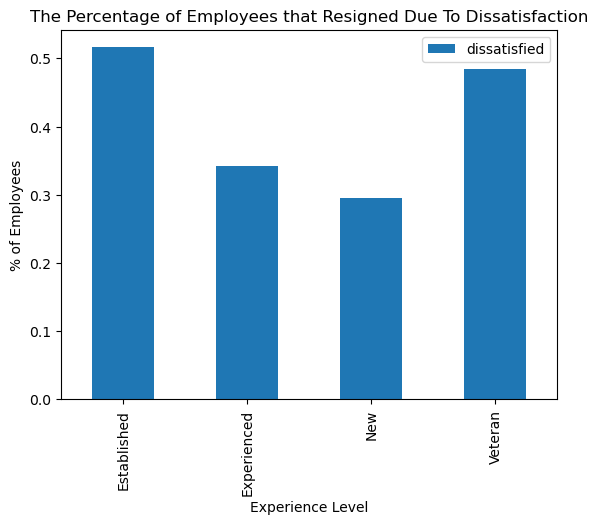

In [30]:
#Create a barchart of the dis_pct results
dis_pct.plot(kind = 'bar', title = 'The Percentage of Employees that Resigned Due To Dissatisfaction',xlabel = 'Experience Level', ylabel = '% of Employees')

# Conclusion

## Questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


## Answers:

1. From looking at the graph above, employee's who resign due to dissatisfaction increase as their career developes over time.

2. Yes, both younger and older employees are resigning due to dissatisfaction.